In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

In [9]:
# Load dataset and split
df = pd.read_csv("../data/cleaned_data.csv")

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Load trained model
model = joblib.load("../results/model.pkl")

In [11]:
# Predictions & Metrics
y_pred = model.predict(X_test)
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 ROC AUC:", roc_auc_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

🔹 Accuracy: 0.7970191625266146
🔹 ROC AUC: 0.6964026933866075

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



<Axes: >

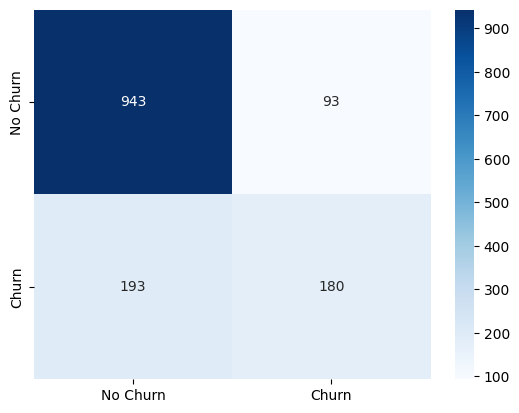

In [12]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"]
)